# **Number Plate Recognition**



Module - 1 : Object Detection

Module - 2: OCR

- **Step 1: Data Collection**
- **Step 2: Labeling**
- **Step 3: Model training**
- **Step 4: Save Model**
- **Step 5: Create Pipeline Model**
- **Step 6: Detect Field**
- **Step 7: Extrect Text (OCR)**

### **Pipeline Model**


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import imutils
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import tensorflow as tf
from glob import glob

In [ ]:
paths = glob("./data/*.jpeg")
print("Total Images :",len(paths))

Total Images : 358


**Load Model**


In [ ]:
model = tf.keras.models.load_model('./Num_plat__mobilenetv2_378_keras.h5')

# Module 1: Detect Field

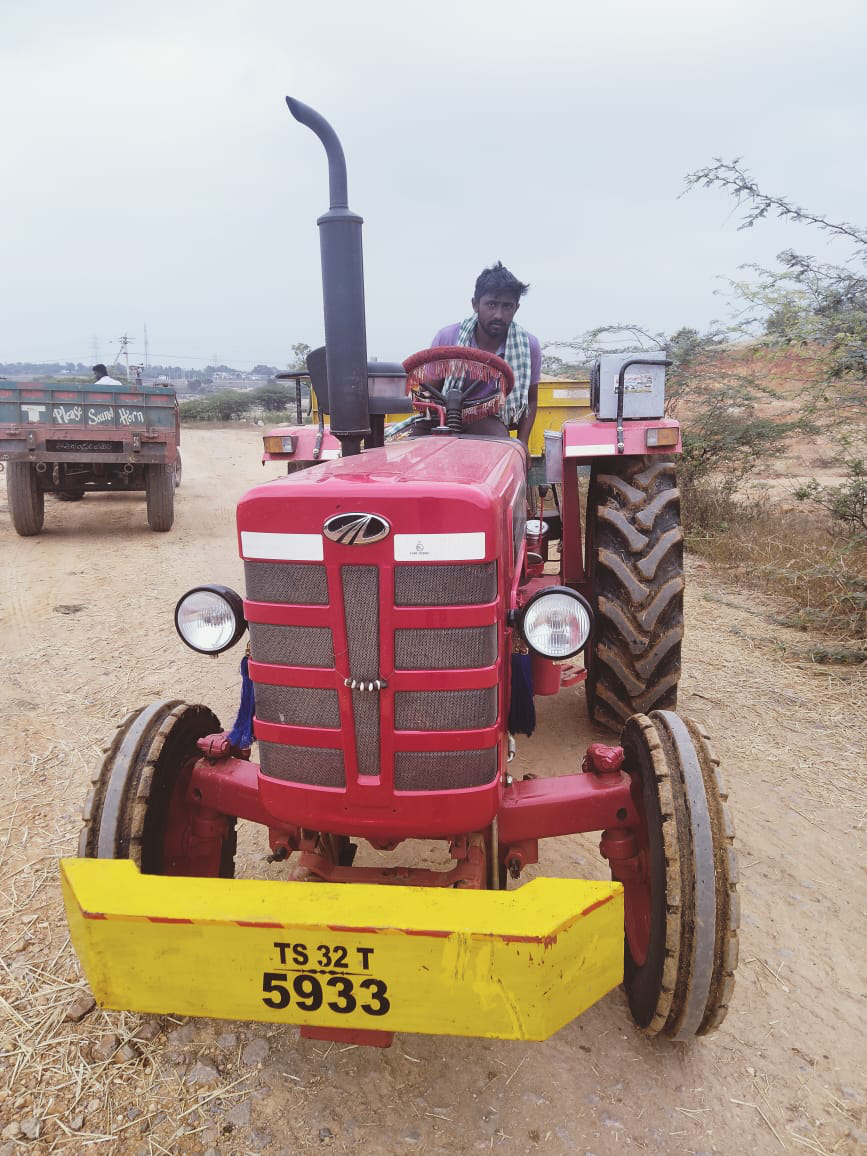

In [ ]:
imagePath='./data/n6.jpeg' # consider sample data
im1 = Image.open(imagePath)
im1

In [ ]:
# puting all together
def pipeline_model(imagePath): 
  image = load_img(imagePath, target_size=(224, 224)) 
  image = img_to_array(image) / 255.0
  image = np.expand_dims(image, axis=0)
  preds = model.predict(image)[0]
  (startX, startY, endX, endY) = preds
  image = cv2.imread(imagePath)
  image = imutils.resize(image, width=600)
  (h, w) = image.shape[:2]
  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)
  cv2.rectangle(image, (startX, startY), (endX, endY),
    (0, 255, 0), 2)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)

**Detected Output**

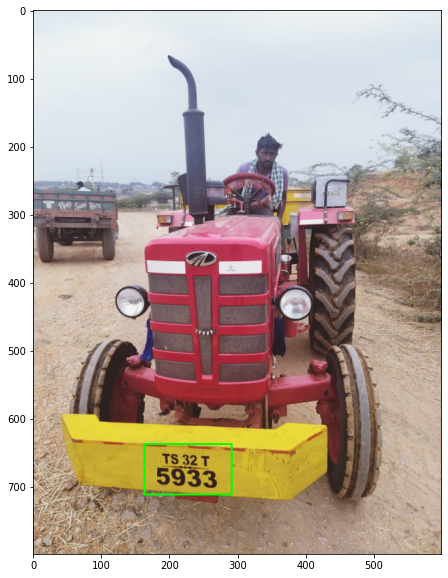

In [ ]:
plt.figure(figsize=(15,10))
pipeline_model(imagePath)




You can that model can able to detect the location onf the number plate perfectly. Now lets use **OCR** to extract text from the number plate

## Module-2: OCR
- Extracting text from the detected number

In [ ]:
# creating pipeline which will return crop image
def pipeline_model2(imagePath):  
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image) / 255.0
  image = np.expand_dims(image, axis=0)
  # make bounding box predictions on the input image
  preds = model.predict(image)[0]
  (startX, startY, endX, endY) = preds
  # load the input image (in OpenCV format), resize it such that it
  
  # fits on our screen, and grab its dimensions
  image = cv2.imread(imagePath)
  image = imutils.resize(image, width=600)
  (h, w) = image.shape[:2]
  # scale the predicted bounding box coordinates based on the image
  # dimensions
  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)
  # draw the predicted bounding box on the image
  cv2.rectangle(image, (startX, startY), (endX, endY),
    (0, 255, 0), 2)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  crop = image[startY:endY,startX:endX]
  return image,crop
  #02 06 05 201 208 195

**Installing OCR Libraries**

In [ ]:
!pip3 install pytesseract

In [ ]:
!apt install tesseract-ocr

importing pytesseract

In [ ]:
import pytesseract as pt # which is an open source OCR

###### Multiple
187
45
193
202
209
225
227
245
248
257
266
287
298
299
300
301
307
314
319
328
330
331
337
340
348

###### Text
111
116
118
135
136
137
138
141
142
144
145
151
158
159
160
161
164
170
173
176
182
187
196
197
199
201
205
207
211
216
219
224
228
234
241
243
244
249
259
260
261
263
269
287
291
297
303
306
308
316
317
320
342
343
345
346
350
353
355
361
362
363
367
371
376

** PA **

145 170 176 216 234 241 260 261 296 291 297 350 353 361

 #135 #7 #111 #376  #196 #342 #145 #154(t) #244 #320 #23 #43 #252 #158 #139 #202 #266 #257 #287 #219 #297 144(t) #126(t)

In [ ]:
ls data/test

1410.jpg  1440_gan.jpg  1520.png  3080.png  6107.png  6995.png  7134.png
1410.png  1520.jpg      3080.jpg  6107.jpg  6995.jpg  7134.jpg  enhance.png


In [ ]:
## testing 
4(120) ,6 ,22(68) , 1  , 7, 15(thres-60) , 20(50) ,121 , 348 ,176 ,216 , 261 (c-128) ,291,350, 353, 248,260(c-125)
#154(t) #126(t),109(t),55(t),64(t) ,332(t),144(t),114(t),138(t) ,226(t) ,167(t),227(t),66(t)

**Now we will do following process**

You output is ready!!!

###### Test images



n222.jpeg', 'n99.jpeg', 'n227.jpeg', 'n144.jpeg', 'n120.jpeg', 'n105.jpeg', 'n352.jpeg', 'n112.jpeg', 'n137.jpeg', 'n141.jpeg', 'n39.jpeg', 'n198.jpeg', 'n167.jpeg', 'n21.jpeg', 'n226.jpeg', 'n138.jpeg', 'n67.jpeg', 'n114.jpeg', 'n163.jpeg', 'n332.jpeg', 'n64.jpeg', 'n55.jpeg', 'n122.jpeg', 'n109.jpeg', 'n14.jpeg', 'n235.jpeg', 'n73.jpeg', 'n362.jpeg', 'n220.jpeg', 'n90.jpeg', 'n72.jpeg', 'n182.jpeg', 'n154.jpeg', 'n356.jpeg', 'n366.jpeg', 'n126.jpeg'

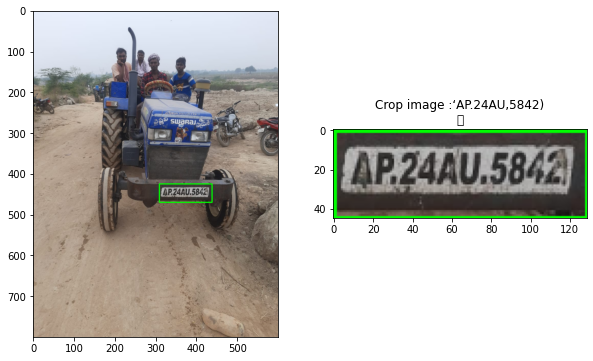

In [ ]:
path='./data/n135.jpeg' #135 #7 #111 #376 #196 #342 #145 #244 #320 #23 #43 #252 #158 #139 #202 #266 #257 #287 #219 #297 
#path = contrast_img
img, crop = pipeline_model2(path)
#im = pencil_array(crop1,rgb=False)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(crop)# Image to text using pytesseract
text = pt.image_to_string(crop) # Send the croped to tesseract-ocr to get text
plt.title("Crop image :{}".format(text))

plt.show()

**Your Model is Ready**

----
*Ramya Devi Gummella*